# Titanic

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
path = os.getcwd()

path


'/datasets/_deepnote_work'

# 1.

In [ ]:
from sklearn.model_selection import train_test_split

# Load your train data
train_data = pd.read_csv(path + '/train.csv')


In [ ]:
test_data = pd.read_csv(path + '/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Predictions

My prediction is that a gender will have alot to do with survival rate. due the common quote 'Women and children first'.

Now lets print out the % of survivings of each gender.

## Important questions?

* Are women more likely to survive than men?
* Do children have a better chance of survival?
* Is there a a bigger difference in survival rate between classes?
* Does having siblings or parents on board have an impact on survival rate?
* Is the data cleaned and ready to be used for predictions?

# Searching for answers!

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

#count of data witouth age value
missing_age_count = train_data["Age"].isna().sum()
age_count = train_data["Age"].count()
print(f"Count of rows without Age value: {missing_age_count} van de {age_count}")

% of men who survived: 0.18890814558058924
Count of rows without Age value: 177 van de 714


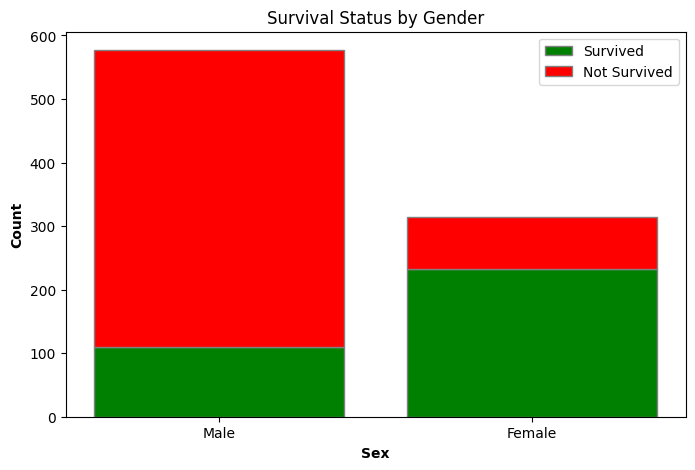

In [ ]:
# Count number of males and females
male_count = len(train_data[train_data['Sex'] == 'male'])
female_count = len(train_data[train_data['Sex'] == 'female'])

# Count number of males and females who survived
male_survived_count = len(train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)])
female_survived_count = len(train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)])

# Count number of males and females who did not survive
male_not_survived_count = male_count - male_survived_count
female_not_survived_count = female_count - female_survived_count

# Labels for the bars
labels = ['Male', 'Female']
survived_counts = [male_survived_count, female_survived_count]
not_survived_counts = [male_not_survived_count, female_not_survived_count]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, survived_counts, color='green', edgecolor='grey', label='Survived')
plt.bar(labels, not_survived_counts, bottom=survived_counts, color='red', edgecolor='grey', label='Not Survived')

# Add labels
plt.xlabel('Sex', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Survival Status by Gender')

# Create legend & show the plot
plt.legend()
plt.show()


In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<img src="image-20240910-190724.png" width="" align="" />

In [ ]:
print(train_data['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


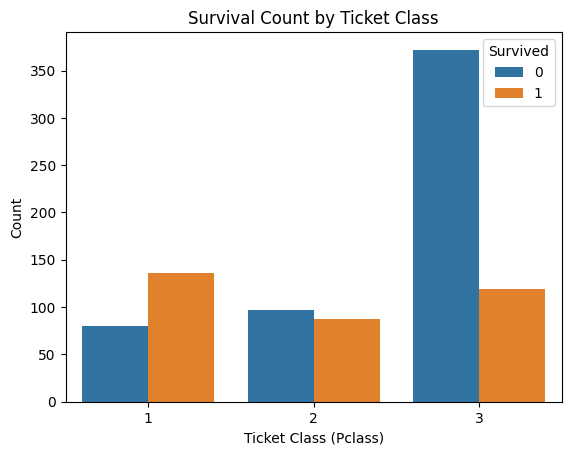

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Count by Ticket Class')
plt.xlabel('Ticket Class (Pclass)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

This shows a clear relation on survival rate depending on your class ticket. It shows that you'll have a very low chance of survival when you were on third class. But First class is actualy performing very good. Good to keep Pclass as a feature then!

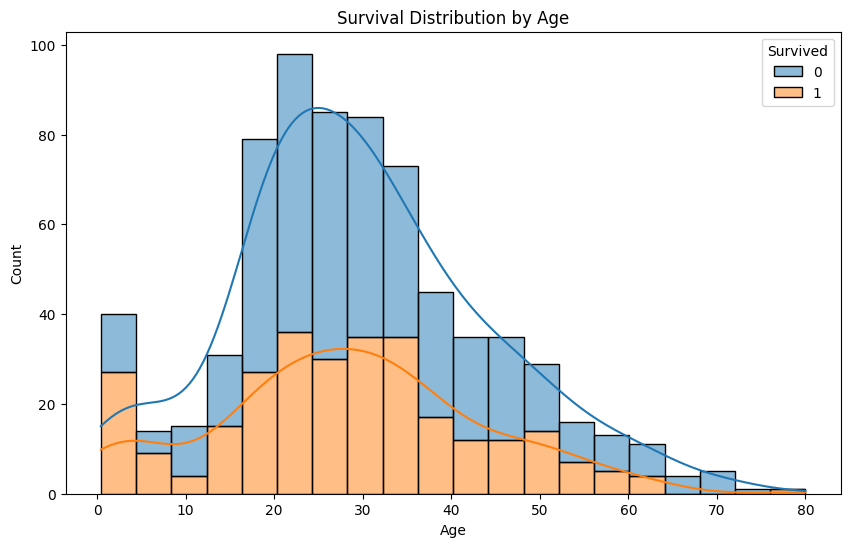

In [ ]:
plt.figure(figsize=(10,6))

# Create a histogram plot for age based on survival
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()


This graph shows a strong relation of a specifc agegroup. Kids aging from 0-8 has a very positive survival rate. The graph also show that most of the passengers are aged between 20-35.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


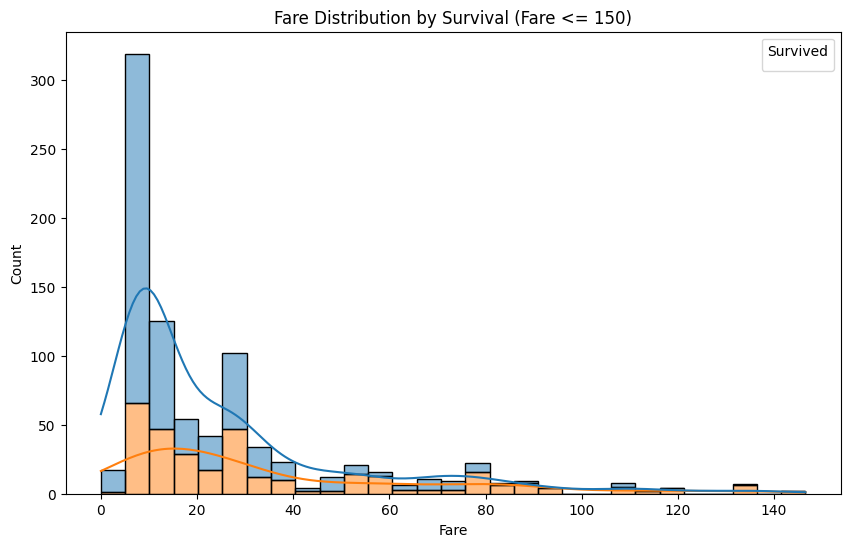

In [ ]:
# Filter the data to focus on fares less than or equal to 150 for better visibility
filtered_data = train_data[train_data['Fare'] <= 150]

# Create a plot for Fare with Survived as the hue
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="Fare", hue="Survived", multiple="stack", kde=True, binwidth=5)

plt.title('Fare Distribution by Survival (Fare <= 150)')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Looking at the fare data, I dont find any reliable data. It would be unfair to use this as a feature because 90% of the passangers have a fare between 5-30. 

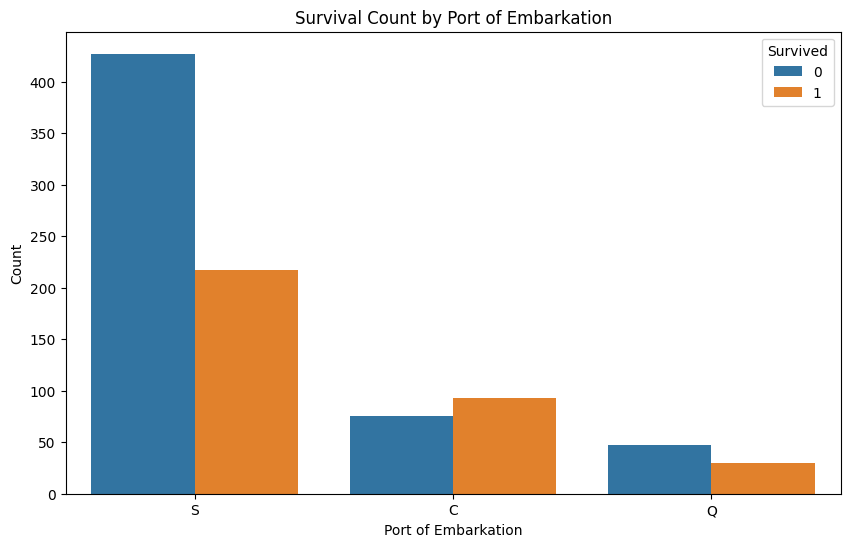

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a plot for Embarked vs Survival
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


This plot shows Embarkation 'S' that twice as much people died, than survived. But for 'C' more people survived at than died. We could see this as a feature, but my question is.. Is this fare to use this? due the big difference of amount of data? There is significant less people that are in 'C' and 'Q' than at 'S'. If all Embarkation would have the same amount of people, would it keep the same ratio? or would the data change.

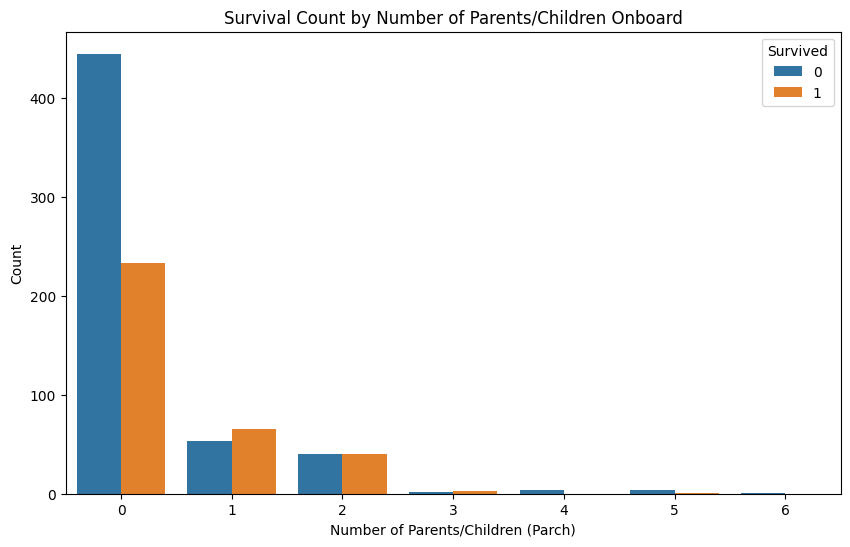

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', hue='Survived', data=train_data)
plt.title('Survival Count by Number of Parents/Children Onboard')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


Not alot of correlation due the different sizes of data available again. Debatable if this column is reliable for a prediction model.

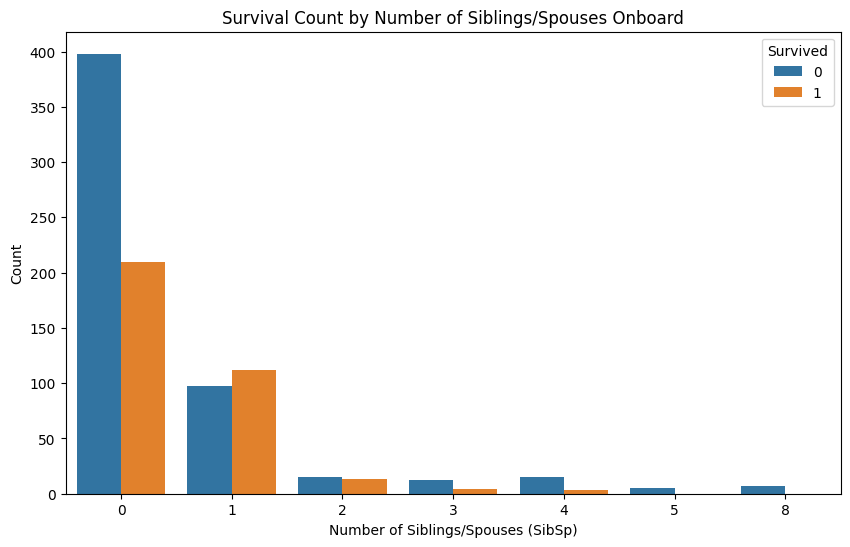

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=train_data)
plt.title('Survival Count by Number of Siblings/Spouses Onboard')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


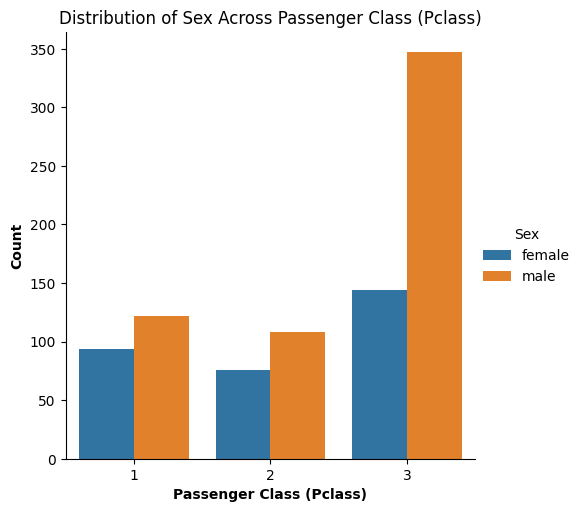

In [ ]:
# Create a categorical plot
sns.catplot(x='Pclass', hue='Sex', kind='count', data=train_data)

# Add labels and title
plt.xlabel('Passenger Class (Pclass)', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Distribution of Sex Across Passenger Class (Pclass)')

# Show the plot
plt.show()

## conclusion of the visualisation

We now have looked at multiple plots that shows the survival rate based on different features. 

so far based on the data visualisations, your odds for survival is bigger when you're either: 
* A child 0-10
* A female
* First class passenger.

more general noted observations:

* Most passangers were between 15-35 years old.
* Oldest passanger is 80 years old, and survived.

Next we'll create a dataset which is relevant for a model. Meaning we get rid of anything we do not think has a reliable relation on the survival of a person, and make the dataset ready by cleaning up the unusable data, or turn categorical columns into usable data using one-hot encoding

In [ ]:
# Dropping all the columns which are not impacting the survival chances in our opinion
Modified_train_data = train_data.drop(columns=['Parch', 'SibSp', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)



In [ ]:
Modified_train_data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


In [ ]:
# Replace 'male' with 1 and 'female' with 0
Modified_train_data['Sex'] = Modified_train_data['Sex'].map({'male': 1, 'female': 0})
Modified_train_data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,S
1,1,1,0,38.0,71.2833,C
2,1,3,0,26.0,7.9250,S
3,1,1,0,35.0,53.1000,S
4,0,3,1,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S
887,1,1,0,19.0,30.0000,S
888,0,3,0,NaN,23.4500,S
889,1,1,1,26.0,30.0000,C


# removing NaN data and apply one-hot encoding

In [ ]:
# Check for any NaN values in X_train_data
print("NaN values in Modified_train_data:")
print(Modified_train_data.isnull().sum())


NaN values in Modified_train_data:
Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64


In [ ]:
# Apply one-hot encoding to the 'Embarked' column
Modified_train_data = pd.get_dummies(Modified_train_data, columns=['Embarked'], prefix='Embarked')

Modified_train_data


,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,False,False,True
1,1,1,0,38.0,71.2833,True,False,False
2,1,3,0,26.0,7.9250,False,False,True
3,1,1,0,35.0,53.1000,False,False,True
4,0,3,1,35.0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,False,False,True
887,1,1,0,19.0,30.0000,False,False,True
888,0,3,0,NaN,23.4500,False,False,True
889,1,1,1,26.0,30.0000,True,False,False


# All data cleaned up and ready to fit into a model? let's split the data up into a training and a validate set.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the data into 70% training and 30% validation sets
train_data, validate_data = train_test_split(Modified_train_data, stratify = Modified_train_data['Survived'], test_size=0.3, random_state=42)

# Calculate the mean for 'Age' and 'Fare' from the training data
mean_age = train_data['Age'].mean()
mean_fare = train_data['Fare'].mean()

# Fill NaN values in the training data
train_data['Age'].fillna(mean_age, inplace=True)
train_data['Fare'].fillna(mean_fare, inplace=True)

# Fill NaN values in the validation data with the same means from the training data
validate_data['Age'].fillna(mean_age, inplace=True)
validate_data['Fare'].fillna(mean_fare, inplace=True)


# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to 'Age' and 'Fare' columns
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
validate_data[['Age', 'Fare']] = scaler.fit_transform(validate_data[['Age', 'Fare']])


# Split the data into features (X) and target (y) for both training and validation
X_train_data = train_data.drop(columns=['Survived'])  # Features for training
y_train_data = train_data['Survived']  # Target (Survived) for training

X_validate_data = validate_data.drop(columns=['Survived'])  # Features for validation
y_validate_data = validate_data['Survived']  # Target (Survived) for validation

# Verify the shapes of the resulting splits
print(f"X_train_data shape: {X_train_data.shape}")
print(f"y_train_data shape: {y_train_data.shape}")
print(f"X_validate_data shape: {X_validate_data.shape}")
print(f"y_validate_data shape: {y_validate_data.shape}")


X_train_data shape: (623, 7)
y_train_data shape: (623,)
X_validate_data shape: (268, 7)
y_validate_data shape: (268,)


(Hieronder) ook bij testdata even de Age en Fare NaN values vullen met het gemiddelde

In [ ]:
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
748,0,1,1,-8.476280e-01,0.465738,False,False,True
45,0,3,1,2.726347e-16,-0.478269,False,False,True
28,1,3,0,2.726347e-16,-0.481848,False,True,False
633,0,1,1,2.726347e-16,-0.646954,False,False,True
403,0,3,1,-1.569695e-01,-0.314823,False,False,True
...,...,...,...,...,...,...,...,...
476,0,2,1,3.034695e-01,-0.206906,False,False,True
190,1,2,0,1.499898e-01,-0.374544,False,False,True
736,0,3,0,1.377827e+00,0.073362,False,False,True
462,0,1,1,1.301087e+00,0.159800,False,False,True


## Train the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=7, max_depth=4, random_state=42)

rf.fit(X_train_data, y_train_data) 

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred = rf.predict(X_validate_data)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1])

## Perform analysis on the model

Feature ranking:
1. feature 1 Pclass (0.578743)
2. feature 3 Sex (0.149109)
3. feature 2 Age (0.128791)
4. feature 0 Fare (0.101324)
5. feature 6 Embarked_C (0.020268)
6. feature 4 Embarked_Q (0.018807)
7. feature 5 Embarked_S (0.002958)


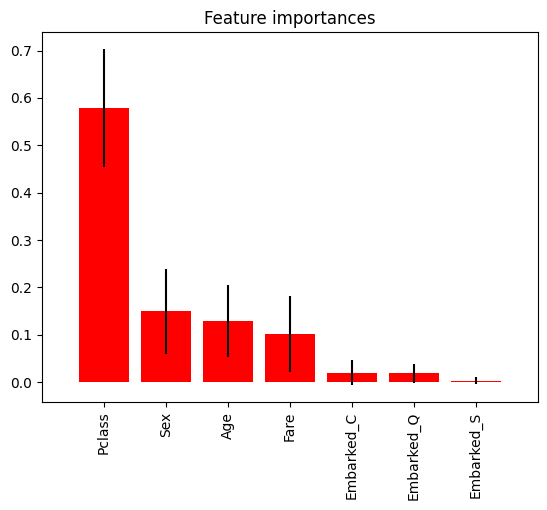

In [ ]:
# feature ranking
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
featuresModelRF = X_train_data.columns
features = pd.Series(featuresModelRF)

# Print the feature ranking
print("Feature ranking:")

index_features=[]
for f in range(len(featuresModelRF)):
    index_features.append(f)
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], features[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(featuresModelRF)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(featuresModelRF)), features[index_features], rotation = 90)
plt.xlim([-1, len(featuresModelRF)])
plt.show()

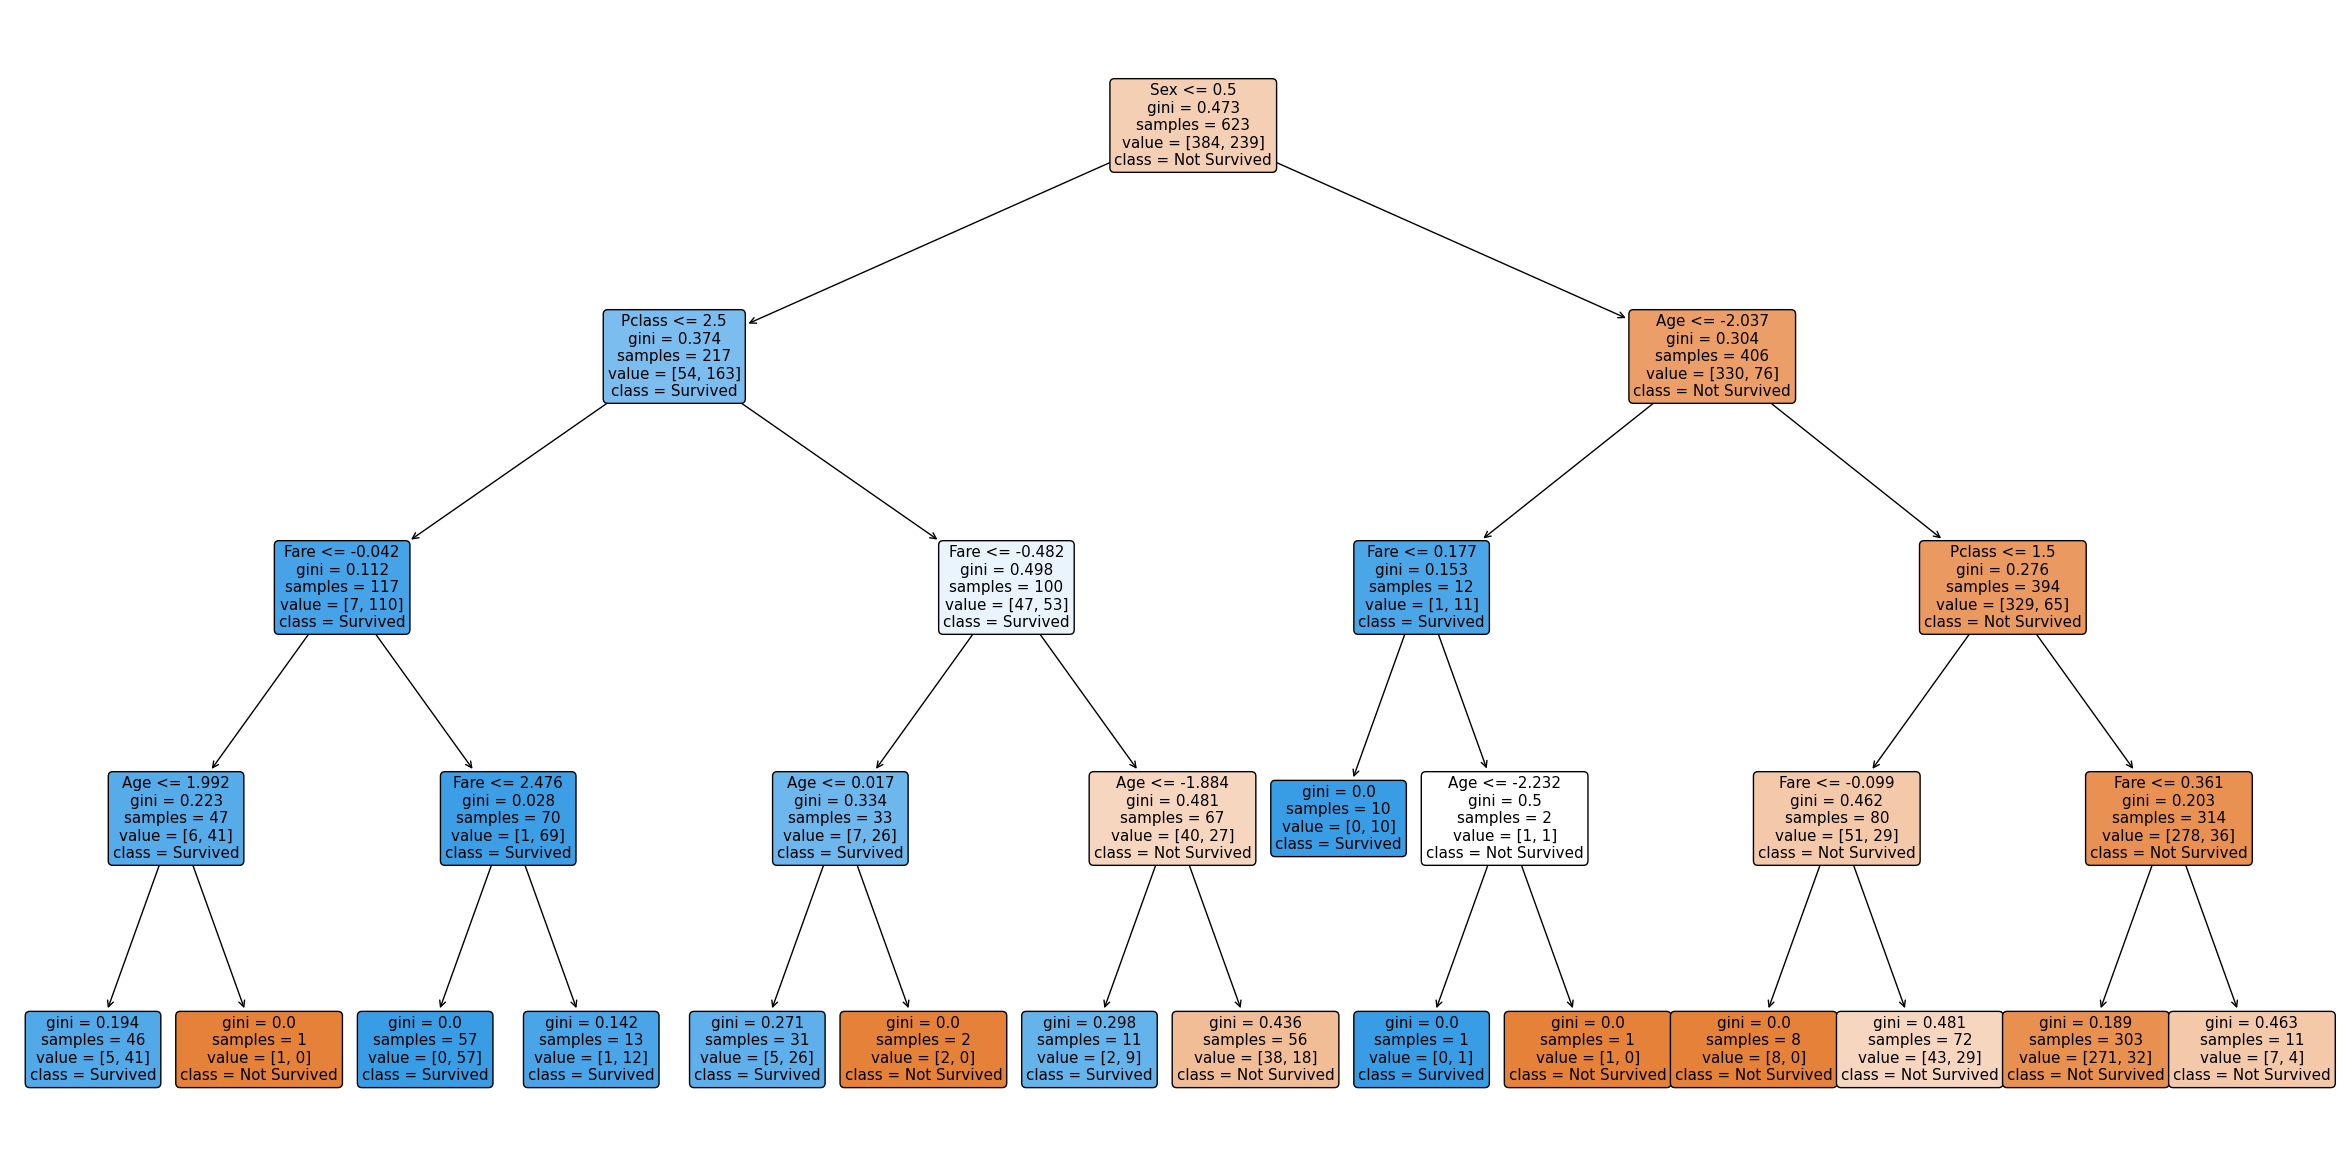

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Increase the figure size for better clarity
# plt.figure(figsize=(30,15))  # Adjust size as needed

# Plot the decision tree with high resolution
# plot_tree(rf, feature_names=X_validate_data.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)

# Save the image as a PNG (Uncommented cuz it takes a few seconds to save :{ 
#plt.savefig("decision_tree_visualization.png", dpi=300)

# Show the plot
# plt.show()


In [ ]:
from sklearn import metrics

y_score = rf.predict_proba(X_validate_data)[:, 1] 
roc = metrics.roc_curve(y_validate_data, y_score, pos_label=1)


# Optionally, calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(roc[0], roc[1])

# Print the ROC curve results
print(f"False Positive Rates: {roc[0]}")
print(f"True Positive Rates: {roc[1]}")
print(f"Thresholds: {roc[2]}")
print(f"ROC AUC: {roc_auc}")




False Positive Rates: [0.         0.         0.00606061 0.00606061 0.00606061 0.00606061
 0.00606061 0.00606061 0.00606061 0.00606061 0.00606061 0.00606061
 0.00606061 0.01212121 0.01212121 0.01212121 0.01212121 0.01212121
 0.01212121 0.01818182 0.01818182 0.02424242 0.02424242 0.03030303
 0.03030303 0.04242424 0.05454545 0.05454545 0.06060606 0.07878788
 0.09090909 0.13333333 0.13333333 0.13939394 0.14545455 0.14545455
 0.15151515 0.16969697 0.18181818 0.18787879 0.2        0.2
 0.20606061 0.21818182 0.23030303 0.23636364 0.27878788 0.29090909
 0.3030303  0.30909091 0.30909091 0.32121212 0.32727273 0.37575758
 0.38181818 0.4        0.4        0.43030303 0.43636364 0.43636364
 0.44242424 0.44848485 0.46666667 0.48484848 0.53939394 0.54545455
 0.56969697 0.57575758 0.62424242 0.63030303 0.66060606 0.67878788
 0.93333333 1.        ]
True Positive Rates: [0.         0.00970874 0.00970874 0.03883495 0.05825243 0.08737864
 0.12621359 0.15533981 0.16504854 0.18446602 0.24271845 0.2815534
 0.

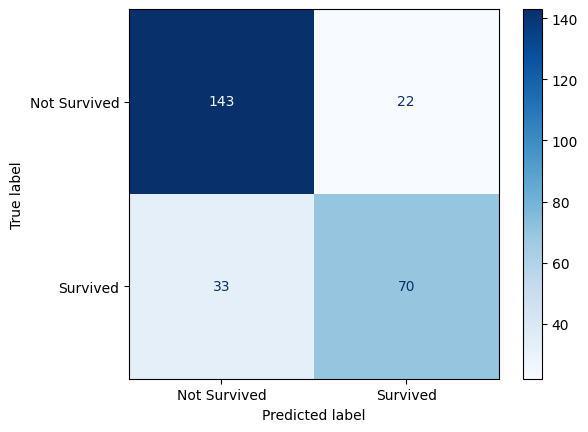

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predicted class labels (not probabilities) for the validation set
y_pred = rf.predict(X_validate_data)

# Generate the confusion matrix
cm = confusion_matrix(y_validate_data, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


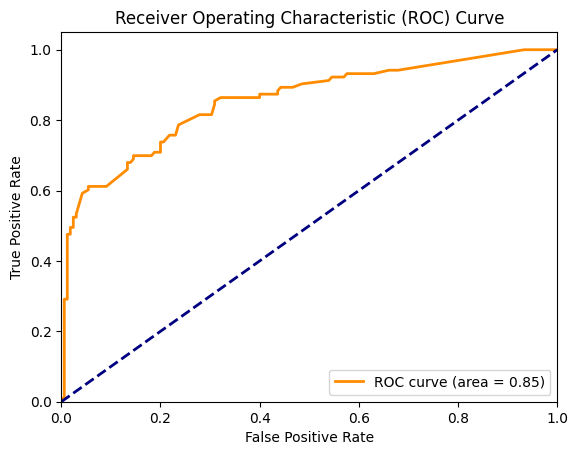

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1) on the validation set
y_score = rf.predict_proba(X_validate_data)[:, 1]  # Get probabilities for class 1

# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_validate_data, y_score, pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Reference line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
def compute_auroc(truth, prediction):
    fpr, tpr, thresholds = metrics.roc_curve(truth, prediction, pos_label=1)
    return metrics.auc(fpr, tpr)

def apply_model(model, validation_function = compute_auroc, print_to_screen = True):
    pred_tree_train = model.predict_proba(X_train_data)
    pred_tree_test = model.predict_proba(X_validate_data)
    
    pred_tree_train = pd.Series(map(lambda x: x[1], pred_tree_train))
    pred_tree_test = pd.Series(map(lambda x: x[1], pred_tree_test))
    
    validation_result_train = validation_function(y_train_data, pred_tree_train) 
    validation_result_test = validation_function(y_validate_data, pred_tree_test)
    
    if print_to_screen:
        print( "Result on trainset:" )
        print( validation_result_train )
        print()
        print( "Result on testset:" )
        print( validation_result_test )
    
    return validation_result_train, validation_result_test

6


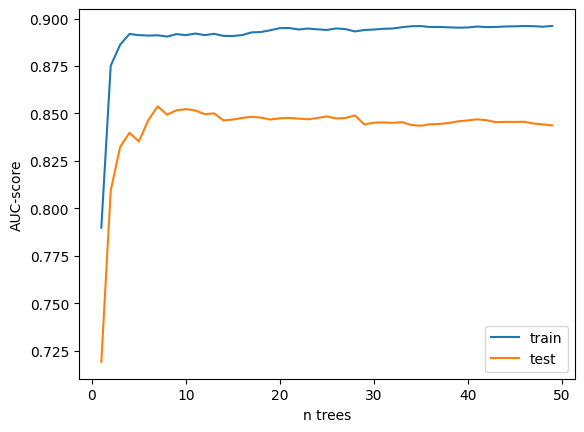

In [ ]:
# Determine the required number of trees

AUC_train = []
AUC_test = []
n_trees = range(1, 50)

for n_tree in n_trees:
    model_rf = RandomForestClassifier(n_estimators=n_tree, max_depth=4, random_state = 42)
    model_rf.fit(X_train_data, y_train_data)

    AUC_train_i, AUC_test_i = apply_model(model_rf, print_to_screen=False)
    AUC_train.append(AUC_train_i)
    AUC_test.append(AUC_test_i)

print(np.array(AUC_test).argmax())    
plt.plot(n_trees, AUC_train, label='train')
plt.plot(n_trees, AUC_test, label='test')
plt.legend()
plt.xlabel('n trees')
plt.ylabel('AUC-score')
plt.show()

In [ ]:
featuresModelRF

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
# Check for overfitting
apply_model(rf)

Result on trainset:
0.8911915969316597

Result on testset:
0.8537216828478965


(0.8911915969316597, 0.8537216828478965)

# Now submitting the test results!

In [ ]:
from sklearn.preprocessing import StandardScaler

# Load your test data
test_data = pd.read_csv(path + '/test.csv')
test_data = test_data.drop(columns=['Parch', 'SibSp', 'Name', 'Ticket', 'Cabin'], axis=1)


test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})


test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix='Embarked')


mean_ageT = test_data['Age'].mean()
mean_fareT = test_data['Fare'].mean()


test_data['Age'].fillna(mean_ageT, inplace=True)
test_data['Fare'].fillna(mean_fareT, inplace=True)


# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to 'Age' and 'Fare' columns
test_data[['Age', 'Fare']] = scaler.fit_transform(test_data[['Age', 'Fare']])

# Check the scaled data
test_data.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,0.334993,-0.498407,False,True,False
1,893,3,0,1.325530,-0.513274,False,False,True
2,894,2,1,2.514175,-0.465088,False,True,False
3,895,3,1,-0.259330,-0.483466,False,False,True
4,896,3,0,-0.655545,-0.418471,False,False,True


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,0.334993,-0.498407,False,True,False
1,893,3,0,1.325530,-0.513274,False,False,True
2,894,2,1,2.514175,-0.465088,False,True,False
3,895,3,1,-0.259330,-0.483466,False,False,True
4,896,3,0,-0.655545,-0.418471,False,False,True
...,...,...,...,...,...,...,...,...
413,1305,3,1,0.000000,-0.494448,False,False,True
414,1306,1,0,0.691586,1.313753,True,False,False
415,1307,3,1,0.651965,-0.508792,False,False,True
416,1308,3,1,0.000000,-0.494448,False,False,True


In [ ]:
# Check for any NaN values in X_train_data
print("NaN values in Modified_train_data:")
print(test_data.isnull().sum())


NaN values in Modified_train_data:
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [ ]:
predict_test_data = test_data.drop(columns=['PassengerId'], axis=1)

predTest = rf.predict(predict_test_data)
predTest

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
import pandas as pd

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  # PassengerId from the test dataset
    'Survived': predTest                      # Predictions from your model
})

# Save the DataFrame to a CSV file
submission.to_csv('submission5.csv', index=False)

<img src="image-20240912-122023.png" width="" align="" />

# After feature scaling:

<img src="image-20240912-124005.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a689159-4dbb-4262-8343-bba92fde3e77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>